In [1]:
from utils_ray import get_info_state, activate_memory_growth; activate_memory_growth(cpu=False)
import tensorflow as tf
from copy import deepcopy, copy
import clubs
import clubs_gym
import gym
from PokerAgent import TensorflowAgent
import time
from random import shuffle
import time
import numpy as np
from utils_ray import print_obs

[INFO] - Models trained on GPU, with memory growth activated.


In [2]:
render_mode = False
env_str = 'LDRL-Poker-v0'
random_model_path = 'value_model_p_0'
trained_model_path = 'value_model_p_0'
agent_fct = TensorflowAgent

# Set game parameters
env_str = 'LDRL-Poker-v0'
num_players = 2
num_streets = 2
num_raises = 3
num_actions = 6
num_cards = [2, 3]
num_suits = 4
num_ranks = 7

n_community_cards = [0] + num_cards[1:]
n_cards_for_hand = min(5, sum(num_cards))
max_bet_number = num_players * num_streets * num_raises

# environment params dict
config_dict = {'num_players': num_players,
                'num_streets': num_streets,
                'blinds': [1, 2],
                'antes': 0,
                'raise_sizes': [2, 4],
                'num_raises': num_raises,
                'num_suits': num_suits,
                'num_ranks': num_ranks,
                'num_hole_cards': num_cards[0],
                'mandatory_num_hole_cards': 0,
                'num_community_cards': n_community_cards,
                'start_stack': 1_000_000,
                'num_cards_for_hand': n_cards_for_hand}

In [3]:
clubs_gym.envs.register({env_str: config_dict})
env = gym.make(env_str)

# create new agents
env.register_agents([agent_fct(model_save_path) for model_save_path in [random_model_path, trained_model_path]])

In [4]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot():
    clear_output(wait=True)
    fig, axs = plt.subplots(2,1, figsize=(8, 8))

    axs[0].plot(range(0, reward_history.shape[0]), reward_history[:,0])
    axs[0].set_title("Player 0's payoff for each game", fontsize=16)
    axs[0].set_xlabel('Game')
    axs[0].set_ylabel('Payoff')

    cum_rew_p_0 = cumulative_reward(reward_history[:,0])
    axs[1].plot(range(0, len(cum_rew_p_0)), cum_rew_p_0)
    axs[1].set_title("Player 0's cumulative payoff", fontsize=16)
    axs[1].set_xlabel('Game')
    axs[1].set_ylabel('cumulative Payoff')

    plt.tight_layout()
    plt.show()

    plt.show()
    
def cumulative_reward(data):
    average = [0]
    
    for value in data:
        average.append(average[-1]+value)
        
    return average

In [5]:
reward_history = None

In [8]:
sleep_time = 0.5

env.reset()
env.render()

if render_mode:
    how_many_games = input('Open the rendered Game, input how many games you wanna see and hit Enter to start.')
else:
    how_many_games = input('How many games do you wanna see? Hit enter to start.')
    
for i in range(int(how_many_games)):
    print(f'\n====================== Game {i} ======================\n')
    
    obs = env.reset()
    
    if render_mode:
        end.render()
        time.sleep(sleep_time)
    else:
        print_obs(obs, num_suits)
    
    history = []
    while True:
        if render_mode:
            time.sleep(sleep_time)
            
        # non terminal-state       
        if all(obs['active']) and not obs['action'] == -1:
            # agent chooses bet/action based on info_state
            info_state = get_info_state(obs, history, max_bet_number, env.dealer.num_streets, config_dict)
            bet = env.act(info_state)
            history.append(bet)     
           
            # take action within environment
            obs, rewards, done, _ = env.step(bet)
            print(f'Action: {bet}')
    
            if render_mode:
                env.render()
            else:
                print('------------------------------------------------\n')
                print_obs(obs, num_suits)
        
        # terminal state
        else:               
            # save results      
            if reward_history is None:
                reward_history = np.array([rewards])
            else:
                reward_history = np.append(reward_history, [rewards], axis=0)
            
            # fancy print stuff only without rendering
            if render_mode:
                live_plot()
            else:
                print(f'Payoffs: Player_0 {rewards[0]}, Player_1 {rewards[1]}')
                
            break


How many games do you wanna see? Hit enter to start.100

====================== Game 0 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (139742422481936): 8♣, Card (139742602225312): K♣]
min_raise: 3, max_raise: 3
call: 1

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 4
Commit: player_0 2, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (139742422481744): Q♣, Card (139742422480256): 8♥]
min_raise: 2, max_raise: 2
call: 0

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 4, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (139742422481936): 8♣, Card (139742602225312): K♣]
min_raise: 4, max_raise: 4
call: 2

Action: 0
---------------

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 10
Commit: player_0 6, player_1 4

--------- player 1's turn ---------
hole_cards: [Card (139742422482800): J♠, Card (139742422481168): J♥]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422480928): 8♦, Card (139742422482128): 9♥, Card (139742422481408): J♦]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 4, Player_1 -4

====================== Game 11 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (139742422481168): J♥, Card (139742422480880): K♠]
min_raise: 3, max_raise: 3
call: 1

Action: 1
------------------------------------------------

--------- game Stat

Action: 0
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422482800): J♠, Card (139742422480256): 8♥, Card (139746964253280): A♣]
Dealer/Button: 1
Pot: 4
Commit: player_0 0, player_1 0

--------- player 0's turn ---------
hole_cards: [Card (139742422482608): T♦, Card (139742422482848): K♦]
min_raise: 4, max_raise: 4
call: 0

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422482800): J♠, Card (139742422480256): 8♥, Card (139746964253280): A♣]
Dealer/Button: 1
Pot: 4
Commit: player_0 0, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (139742422481264): T♥, Card (139742422480880): K♠]
min_raise: 4, max_raise: 4
call: 0

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422482800): J♠, Card (139742422480256): 8♥, Card (139746964253280): A♣]
Dealer/Button: 1
Pot: 0
Com

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 4
Commit: player_0 2, player_1 2

--------- player 1's turn ---------
hole_cards: [Card (139742422482272): 9♣, Card (139742602225456): A♠]
min_raise: 2, max_raise: 2
call: 0

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (139746964253328): A♥, Card (139742422481744): Q♣]
min_raise: 4, max_raise: 4
call: 2

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 10
Commit: player_0 6, player_1 4

--------- player 1's turn ---------
hole_cards: [Card (139742422482272): 9♣, Card (139742602225456): A♠]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game 

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (139742422481696): Q♦, Card (139742422481600): Q♥]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422482224): 9♦, Card (139742422482368): T♠, Card (139742422481168): J♥]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -2, Player_1 2

====================== Game 43 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (139742422482128): 9♥, Card (139742422482800): J♠]
min_raise: 3, max_raise: 3
call: 1

Action: 5
------------------------------------------------

--------- game Stats

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 14
Commit: player_0 8, player_1 6

--------- player 1's turn ---------
hole_cards: [Card (139746964253328): A♥, Card (139742422481456): J♣]
min_raise: 0, max_raise: 0
call: 2

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422481168): J♥, Card (139742422482368): T♠, Card (139742422482224): 9♦]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 6, Player_1 -6

====================== Game 50 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (139742422482272): 9♣, Card (139742422480976): 8♠]
min_raise: 3, max_raise: 3
call: 1

Action: 4
------------------------------------------------

--------- game Stat

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422481168): J♥, Card (139746964253664): A♦, Card (139742422482848): K♦]
Dealer/Button: 0
Pot: 16
Commit: player_0 0, player_1 0

--------- player 0's turn ---------
hole_cards: [Card (139742422480976): 8♠, Card (139742422482272): 9♣]
min_raise: 4, max_raise: 4
call: 0

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422481168): J♥, Card (139746964253664): A♦, Card (139742422482848): K♦]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 8, Player_1 -8

====================== Game 60 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (139742422482752): T♣, Card (139742422482608): T♦]
min_raise: 3, max_raise: 3
call: 

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422481552): Q♠, Card (139742422482032): 9♠, Card (139746964253664): A♦]
Dealer/Button: 0
Pot: 12
Commit: player_0 0, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (139742422481456): J♣, Card (139742422482272): 9♣]
min_raise: 8, max_raise: 8
call: 4

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422481552): Q♠, Card (139742422482032): 9♠, Card (139746964253664): A♦]
Dealer/Button: 0
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -4, Player_1 4

====================== Game 70 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 3
Commit: player_0 2, player_1 1

--------- player 1's turn ---------
hole_cards: [Card (139742422482224): 9♦, Card (139742422480976): 8♠]
min_raise: 3, max_raise: 3
call: 

Action: 4
------------------------------------------------

--------- game Stats ---------
community_cards: []
Dealer/Button: 1
Pot: 6
Commit: player_0 2, player_1 4

--------- player 0's turn ---------
hole_cards: [Card (139742602225456): A♠, Card (139742422481936): 8♣]
min_raise: 4, max_raise: 4
call: 2

Action: 1
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422481600): Q♥, Card (139746964253328): A♥, Card (139742422481168): J♥]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 -2, Player_1 2

====================== Game 81 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (139742422480928): 8♦, Card (139742422481744): Q♣]
min_raise: 3, max_raise: 3
call: 1

Action: 5
------------------------------------------------

--------- game Stats

Action: 5
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422480976): 8♠, Card (139742422480880): K♠, Card (139742422480256): 8♥]
Dealer/Button: 1
Pot: 12
Commit: player_0 4, player_1 0

--------- player 1's turn ---------
hole_cards: [Card (139746964253328): A♥, Card (139742422480928): 8♦]
min_raise: 8, max_raise: 8
call: 4

Action: 2
------------------------------------------------

--------- game Stats ---------
community_cards: [Card (139742422480976): 8♠, Card (139742422480880): K♠, Card (139742422480256): 8♥]
Dealer/Button: 1
Pot: 0
Commit: player_0 0, player_1 0

[INFO] - End of the Game.
Payoffs: Player_0 4, Player_1 -4

====================== Game 93 ======================

--------- game Stats ---------
community_cards: []
Dealer/Button: 0
Pot: 3
Commit: player_0 1, player_1 2

--------- player 0's turn ---------
hole_cards: [Card (139746964253664): A♦, Card (139742422481696): Q♦]
min_raise: 3, max_raise: 3
call: 

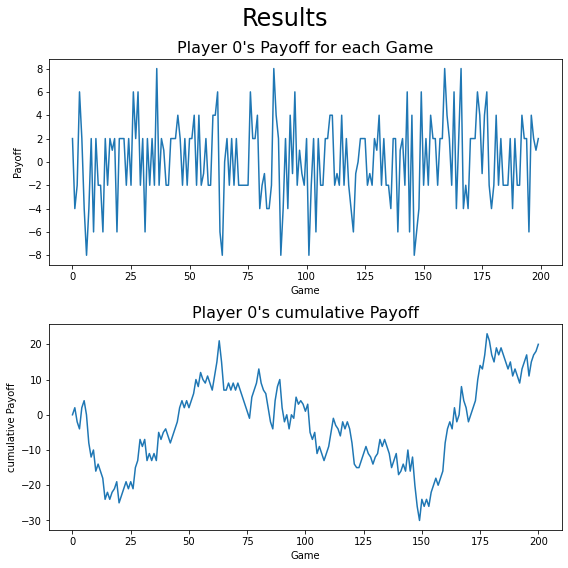

In [9]:
fig, axs = plt.subplots(2,1, figsize=(8, 8))

axs[0].plot(range(0, reward_history.shape[0]), reward_history[:,0])
# axs[0].plot(range(0, reward_history.shape[0]), reward_history[:,1])
axs[0].set_title("Player 0's Payoff for each Game", fontsize=16)
axs[0].set_xlabel('Game')
axs[0].set_ylabel('Payoff')

cum_rew_p_0 = cumulative_reward(reward_history[:,0])
# cum_rew_p_1 = cumulative_reward(reward_history[:,1])

axs[1].plot(range(0, len(cum_rew_p_0)), cum_rew_p_0)
# axs[1].plot(range(0, len(cum_rew_p_1)), cum_rew_p_1)
axs[1].set_title("Player 0's cumulative Payoff", fontsize=16)
axs[1].set_xlabel('Game')
axs[1].set_ylabel('cumulative Payoff')

plt.suptitle('Results', fontsize=24)

plt.tight_layout()
plt.show()